# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^

### Understanding the structure of the data

In [27]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [73]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [3]:
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [4]:
#df.info() or df.dtypes both work, the latter is less info.
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
#Multiple ways to do this.
# df_clean = df.dropna()

#Check whether there are missing values first:
missing_values = df.isnull().sum()

#Method to fill missing values with 0
df_filled = df.fillna(0) 

print(missing_values)

#We can see that there are no missing values.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
#mean = df['Column1'].mean()

minimum = df['food_preparation_time'].min()
average = df['food_preparation_time'].mean()
maximum = df['food_preparation_time'].max()

print(minimum)
print(average)
print(maximum)

20
27.371970495258168
35


#### Observations:


### **Question 5:** How many orders are not rated?

In [8]:
# Count orders with missing ratings

not_rated_count = df['rating'].value_counts()["Not given"]

print(f'The number of orders not rated is: {not_rated_count}')

The number of orders not rated is: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

In [ ]:
Variables to analyze:
    
Numerical:
cost_of_the_order
rating
food_preparation_time
delivery_time

Categorical:
order_id
customer_id
restaurant_name
cuisine_type

I will only analyze the numerical

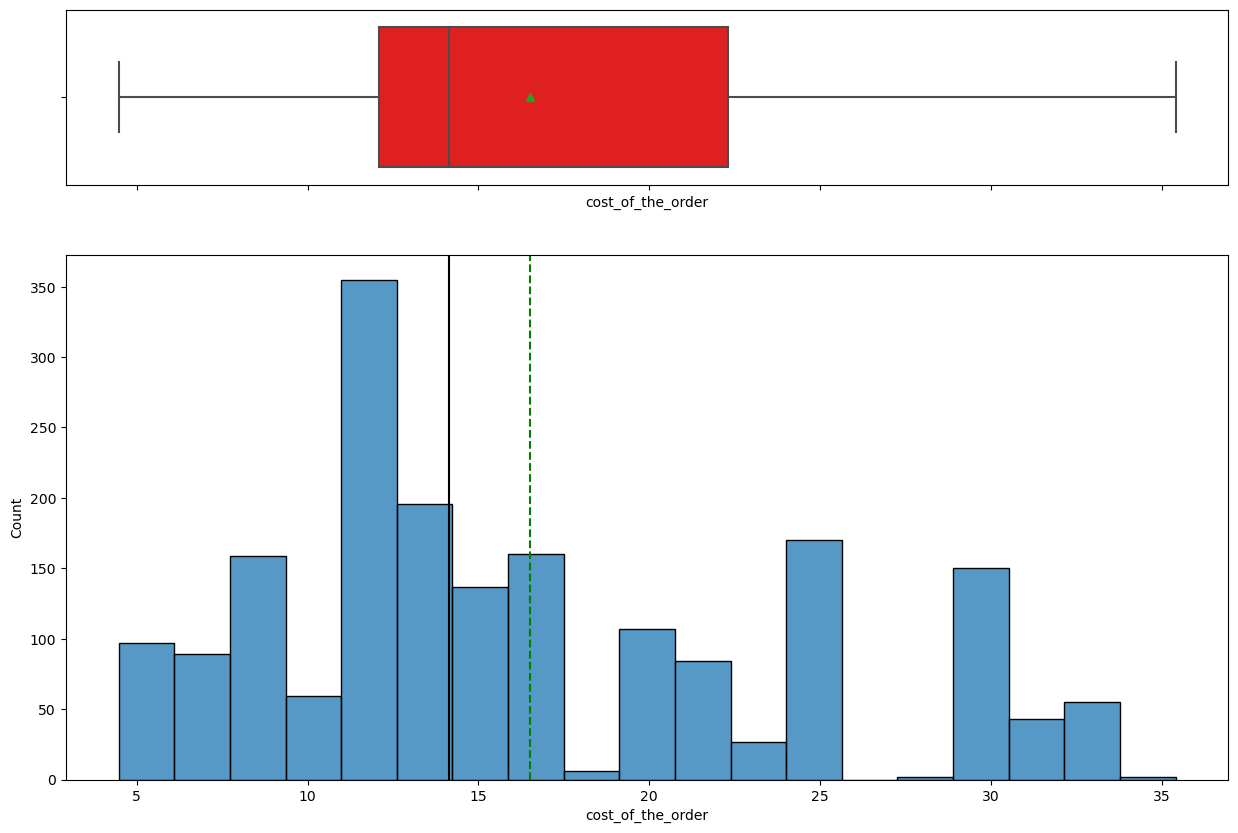

In [46]:
histogram_boxplot(df.cost_of_the_order)

In [50]:
#**#Observations:**
#* #The distribution of cost_of_the_order is highly right-skewed.
#* #The majority of the food cost around 11-13 USD.
# The mean is 16.5

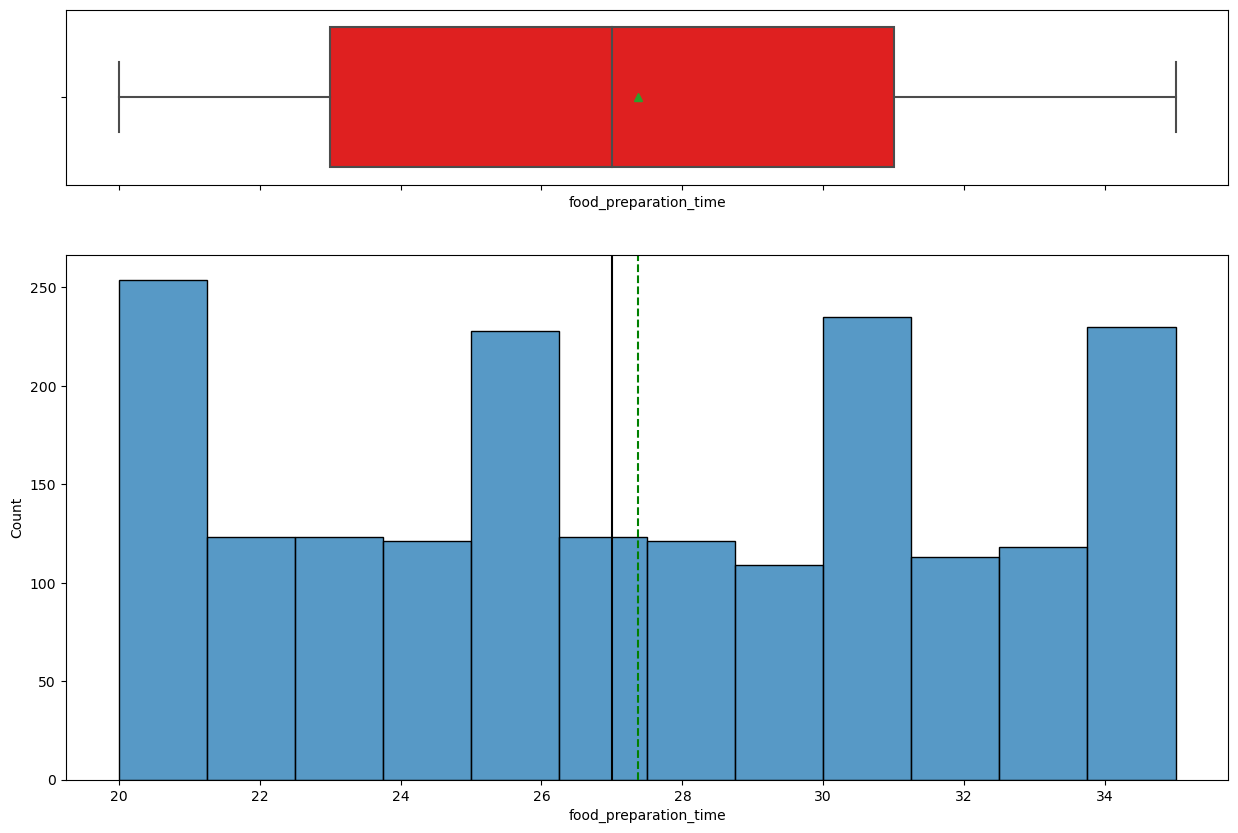

In [52]:
histogram_boxplot(df.food_preparation_time)

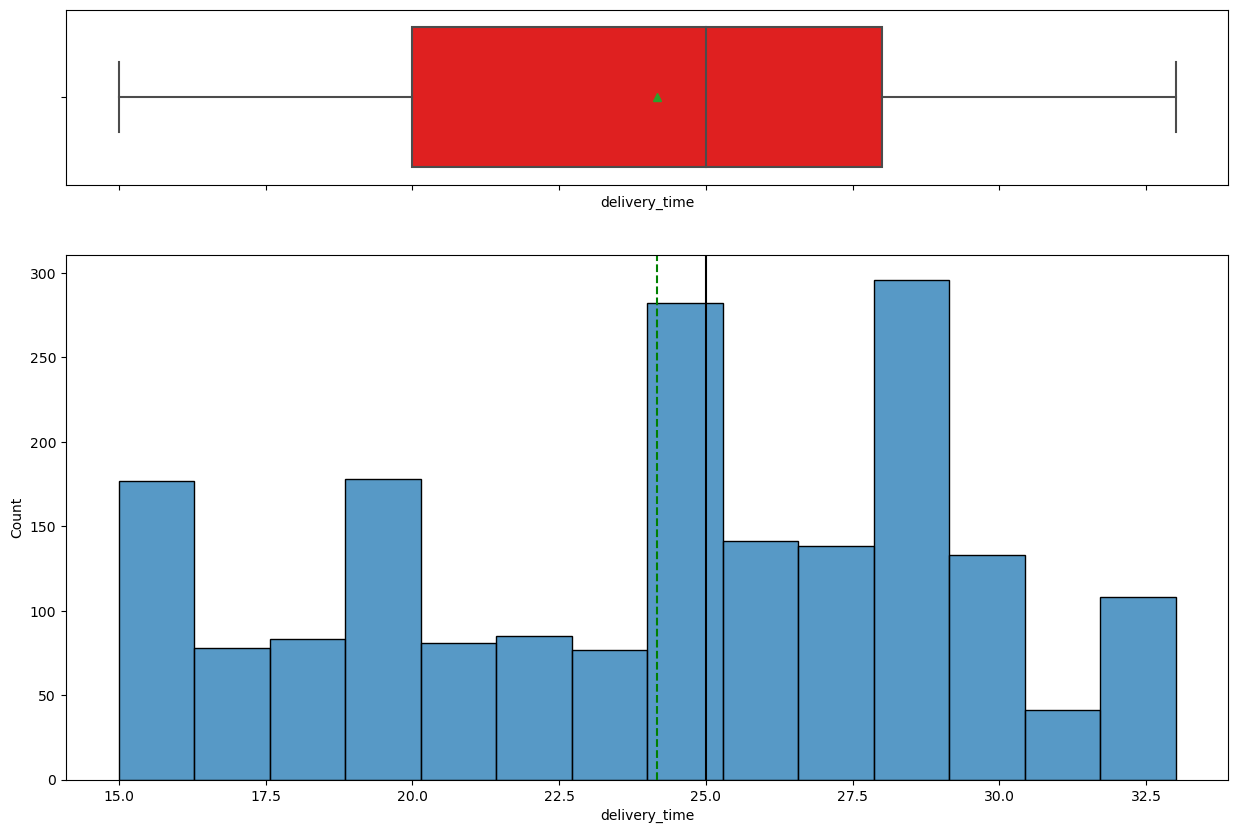

In [53]:
histogram_boxplot(df.delivery_time)

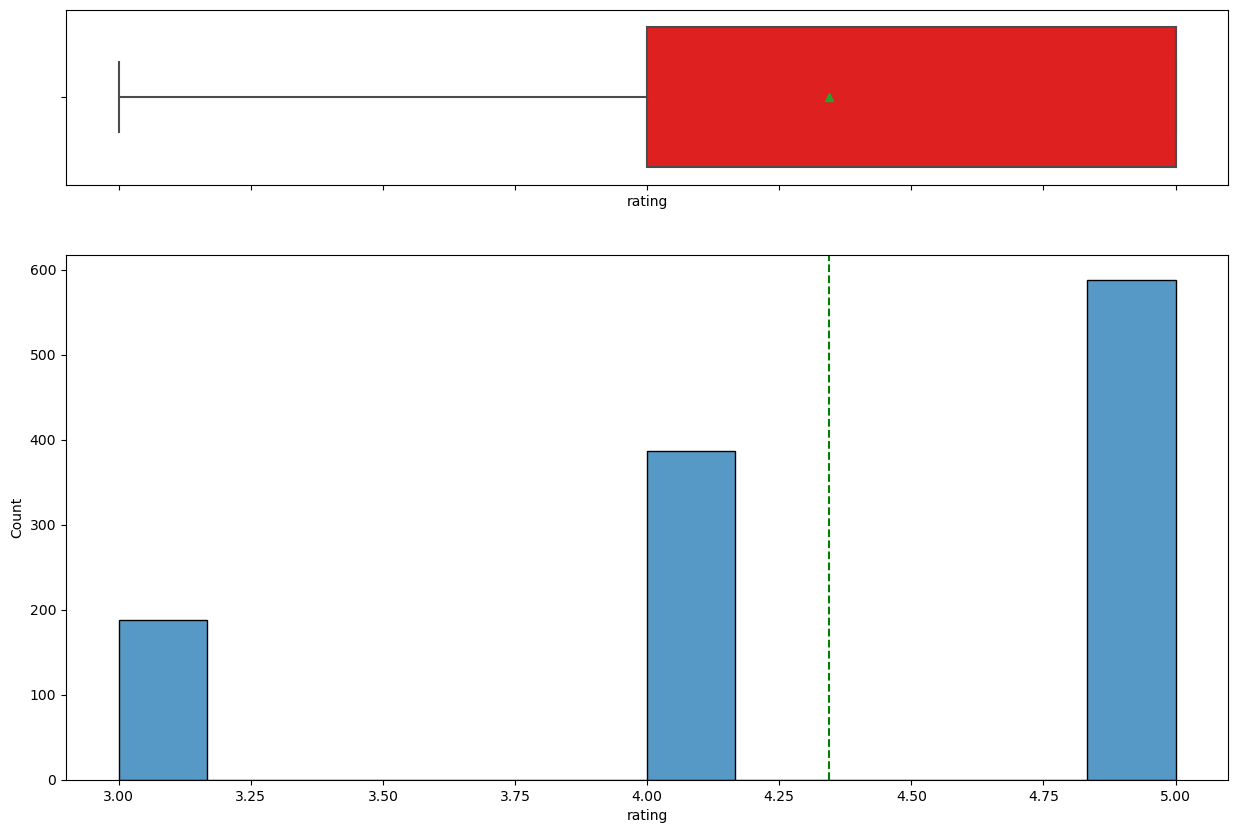

In [55]:
# Replace string values in 'rating' column with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

histogram_boxplot(df.rating)

In [56]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

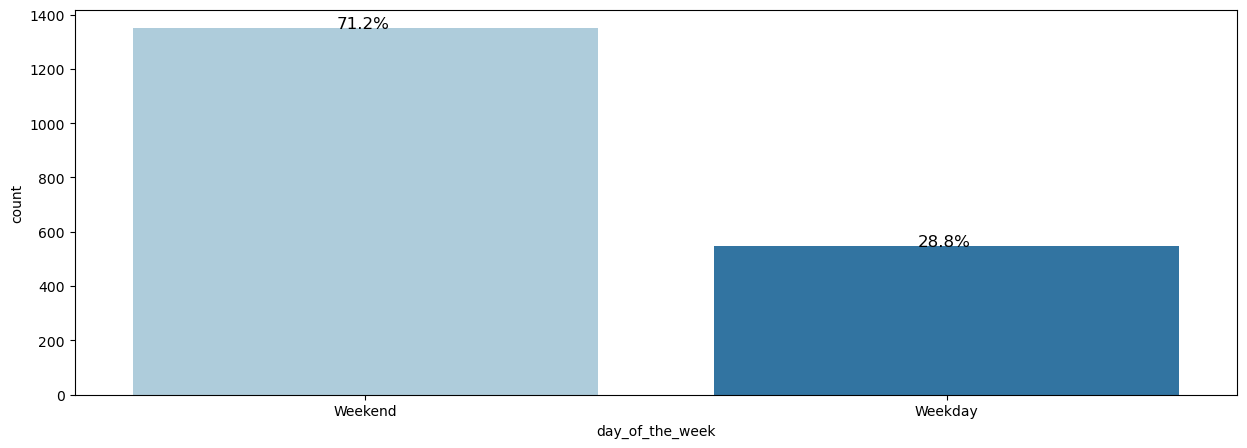

In [57]:
bar_perc(df, 'day_of_the_week')

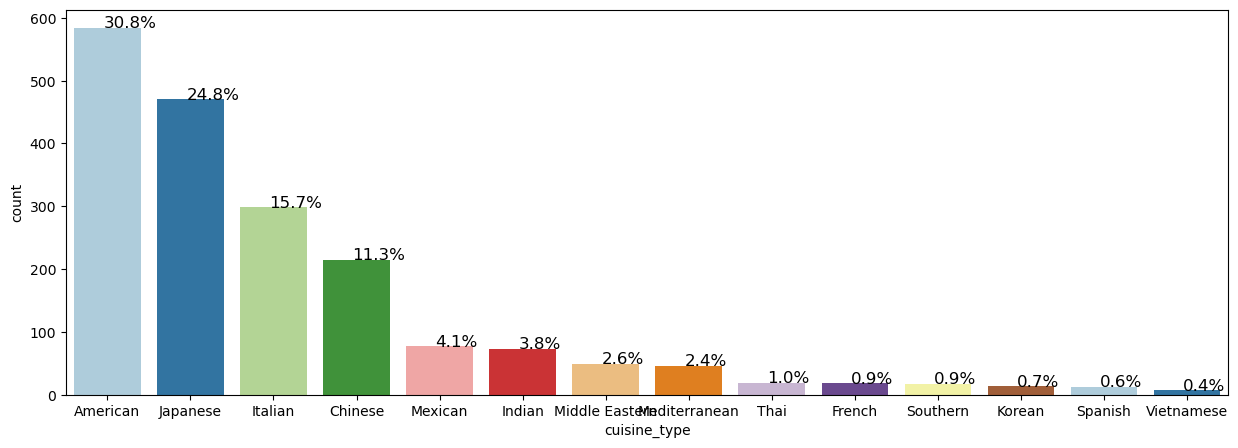

In [58]:
bar_perc(df, 'cuisine_type')

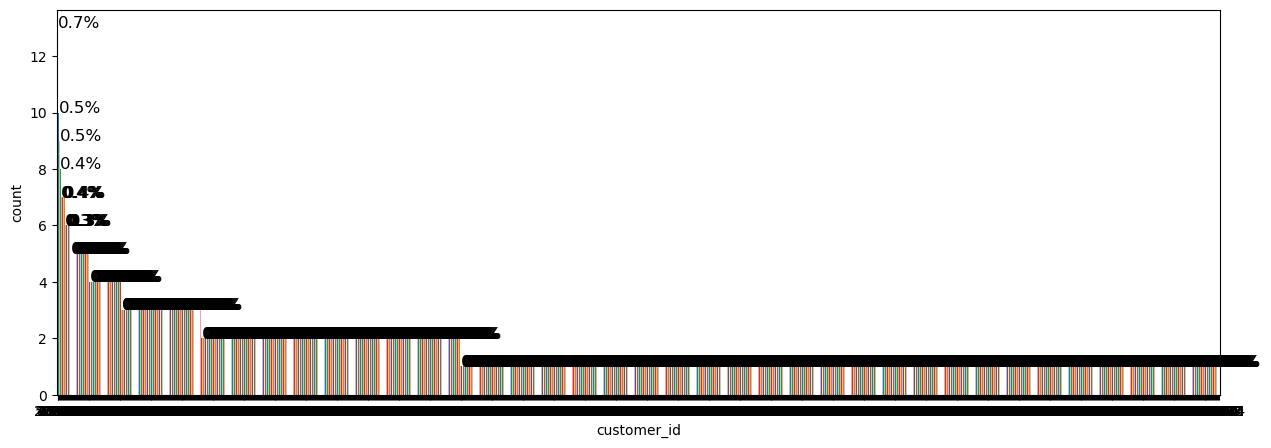

In [60]:
bar_perc(df, 'customer_id')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [9]:
#Groupby Rest Name, sum Order Id, and Select top 5

df.groupby(['restaurant_name'])['order_id'].sum().nlargest(5)

restaurant_name
Shake Shack                  323578315
The Meatball Shop            195029322
Blue Ribbon Sushi            175813497
Blue Ribbon Fried Chicken    141840344
Parm                         100476245
Name: order_id, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [10]:
#Filter Weekend
#store_data.loc[4,'type'] = 'Electronics'
df.loc['day_of_the_week']="Weekend"

df.groupby(['cuisine_type'])['order_id'].sum().head(1)


cuisine_type
American    862853485
Name: order_id, dtype: object

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [13]:
# Calculate the percentage of orders that cost more than $20
percentage_above_20 = (len(df[df['cost_of_the_order'] > 20]) / len(df)) * 100

print(f"{percentage_above_20:.2f}% of the orders cost more than $20.")


29.24% of the orders cost more than $20.


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [14]:
mean_dtime=df['delivery_time'].mean()

print(f"{mean_dtime:.2f} is the mean order delivery time")


24.16 is the mean order delivery time


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
#Groupby Order, sum Order Id, and Select top 3

df.groupby(['customer_id'])['order_id'].value_counts().nlargest(3)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<Axes: >

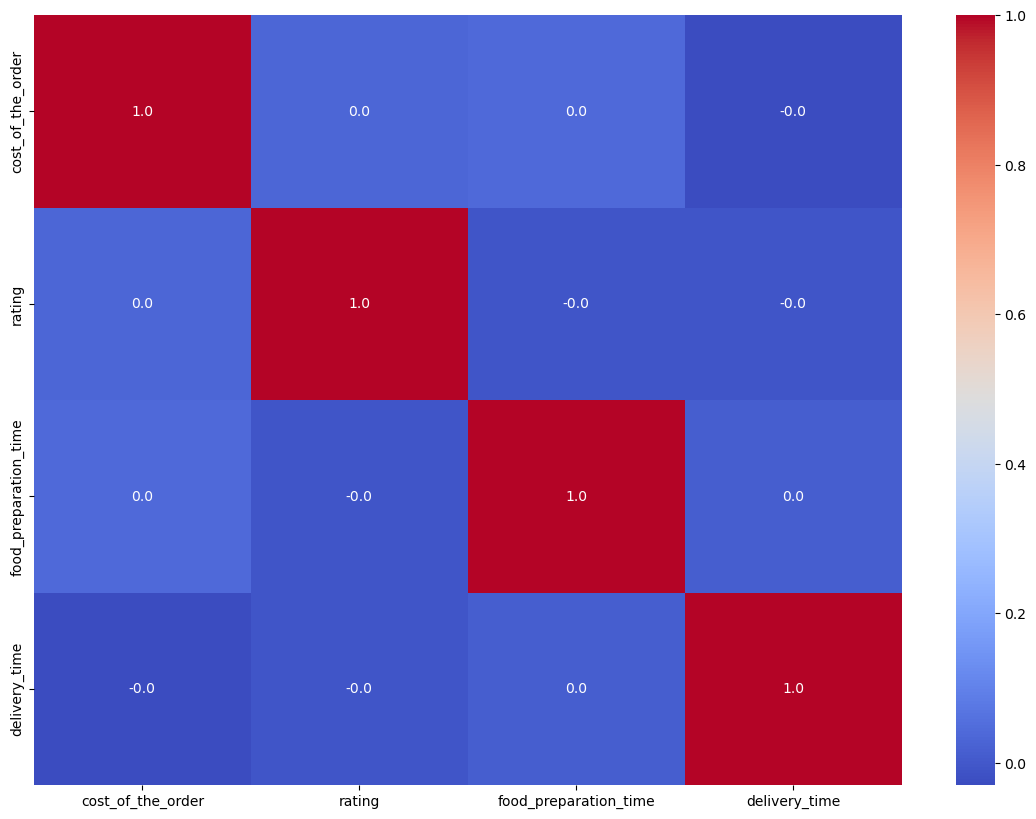

In [61]:
# Check for correlation among numerical variables
# Replace string values in 'rating' column with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

num_var = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = ".1f",            
        xticklabels = corr.columns,            
        yticklabels = corr.columns)

In [64]:
##**Relationship between orders
and time based variables**

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Maria Vinke\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^

In [ ]:
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_month", y = "pickups", data = df, ci = 0, color = "RED", estimator = 'sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [32]:
# Replace string values in 'rating' column with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate total rating count and average rating per restaurant
df['rating_count'] = df.groupby('restaurant_name')['rating'].transform('count')
df['average_rating'] = df.groupby('restaurant_name')['rating'].transform('mean')

# Drop duplicate rows to keep only unique restaurant information
df_unique = df[['restaurant_name', 'rating_count', 'average_rating']].drop_duplicates()

# Filter restaurants for promotional offer criteria
promotional_restaurants = df_unique[(df_unique['rating_count'] > 50) & (df_unique['average_rating'] > 4)]

# Display the result
print("Restaurants fulfilling the criteria for the promotional offer:")
print(promotional_restaurants)

Restaurants fulfilling the criteria for the promotional offer:
              restaurant_name  rating_count  average_rating
3   Blue Ribbon Fried Chicken            64        4.328125
6           The Meatball Shop            84        4.511905
15                Shake Shack           133        4.278195
19          Blue Ribbon Sushi            73        4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [125]:
# Initialize a variable to store the total revenue
net_revenue = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    order_cost = row['cost_of_the_order']
    
    # Calculate revenue for orders with cost > $20 (25% charge)
    if order_cost > 20:
        revenue = order_cost * 0.25
    
    # Calculate revenue for orders with cost > $5 (15% charge) but not already charged
    elif order_cost > 5:
        revenue = order_cost * 0.15
    else:
        revenue = 0
    
    # Add the revenue to the total net revenue
    net_revenue += revenue

print(f"The net revenue generated by the company across all orders is ${net_revenue:.2f}")

The net revenue generated by the company across all orders is $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [140]:
#Create a column with total_delivery_time

df_new['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']


# Calculate the percentage of orders that take more than 60 minutes for delivery
total_orders = len(df_new)
orders_over_60_minutes = len(df_new[df_new['total_delivery_time'] > 60])
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

print(f"{percentage_over_60_minutes:.2f}% of orders take more than 60 minutes for delivery.")

10.54% of orders take more than 60 minutes for delivery.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [143]:

df_2=df.groupby('day_of_the_week')['delivery_time'].mean()

# Calculate the difference in mean delivery time between weekends and weekdays
mean_delivery_time_weekend = df_2['Weekend']
mean_delivery_time_weekday = df_2['Weekday']
difference_mean_delivery_time = mean_delivery_time_weekend - mean_delivery_time_weekday

print("Mean delivery time by weekday/weekend:")
print(df_2)

print(f"Difference in mean delivery time between weekends and weekdays: {difference_mean_delivery_time} minutes")

Mean delivery time by weekday/weekend:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64
Difference in mean delivery time between weekends and weekdays: -5.870014357297798 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  

### Recommendations:

*  

---